✅ Data loaded. Shape: (368065, 23)
✅ Model trained.
🔍 Accuracy: 0.4806

Classification Report:
               precision    recall  f1-score   support

           0       0.41      0.21      0.28     29505
           1       0.50      0.79      0.61     36738
           2       0.00      0.00      0.00      7370

    accuracy                           0.48     73613
   macro avg       0.30      0.33      0.30     73613
weighted avg       0.41      0.48      0.42     73613



C:\Users\sagni\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\sagni\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\sagni\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(ave

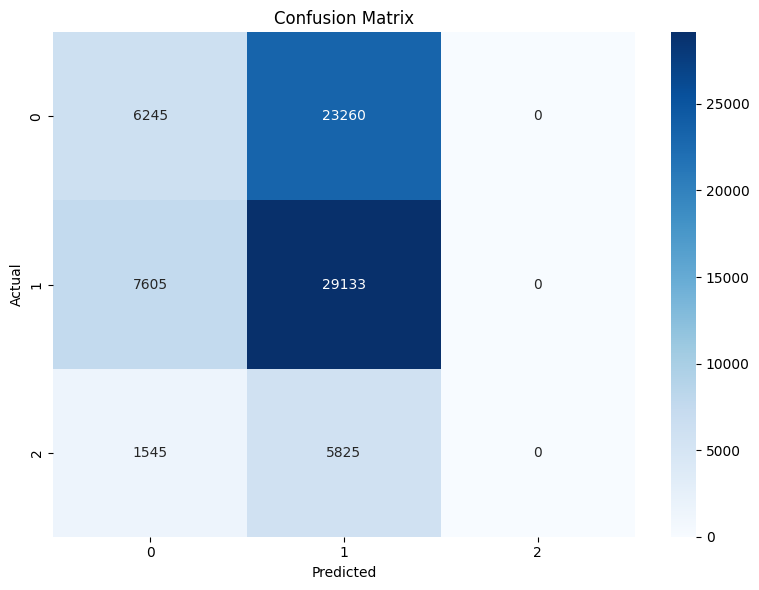

🔮 Sample Predictions:
Sample 1: True Label = 1, Predicted = 1
Sample 2: True Label = 1, Predicted = 1
Sample 3: True Label = 0, Predicted = 1
Sample 4: True Label = 0, Predicted = 0
Sample 5: True Label = 0, Predicted = 0


In [1]:
# --- Imports ---
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# --- Load Data ---
data_path = r"C:\Users\sagni\Downloads\CrowdAssist\cleaned_data.csv"
data = pd.read_csv(data_path)

print("✅ Data loaded. Shape:", data.shape)

# --- Define features and label ---
TARGET_COL = 'Label'
X = data.drop(columns=[TARGET_COL])
y = data[TARGET_COL]

# --- Feature Scaling ---
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# --- Train/Test Split ---
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y)

# --- Model Training ---
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# --- Model Evaluation ---
y_pred = model.predict(X_test)
acc = accuracy_score(y_test, y_pred)

print("✅ Model trained.")
print(f"🔍 Accuracy: {acc:.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# --- Confusion Matrix Heatmap ---
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()

# --- Sample Predictions ---
sample_indices = np.random.choice(len(X_test), size=5, replace=False)
sample_X = X_test[sample_indices]
sample_y_true = y_test.iloc[sample_indices]
sample_y_pred = model.predict(sample_X)

print("🔮 Sample Predictions:")
for i in range(len(sample_indices)):
    print(f"Sample {i+1}: True Label = {sample_y_true.iloc[i]}, Predicted = {sample_y_pred[i]}")
